In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurements', 'stations']

In [6]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [7]:
session = Session(engine)

In [8]:
weather_data = []
for row in session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > '2017-00-00').all():
    weather_data.append(row)

In [9]:
first_row = session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2c7296ae160>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [10]:
weatherdf = pd.DataFrame(weather_data)
weatherdf = weatherdf.set_index('date')
weatherdf.rename(columns={'prcp': 'precipitation'}, inplace=True)

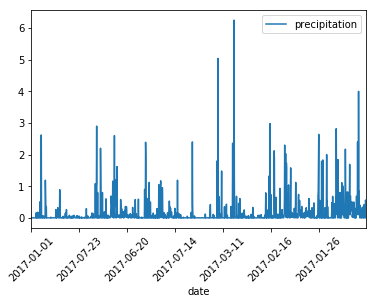

In [21]:
weatherdf.plot()
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show()

In [12]:
weatherdf.describe()

,precipitation
count,1397.000000
mean,0.150487
std,0.434943
min,0.000000
25%,0.000000
50%,0.000000
75%,0.090000
max,6.250000


In [13]:
session.query(func.count(Stations.station)).all()

[(9)]

In [14]:
session.query(Stations.station, func.count(Measurements.station)).\
filter(Stations.station == Measurements.station).\
group_by(Stations.station).\
order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
most_observed = session.query(Stations.station, func.count(Measurements.station)).\
filter(Stations.station == Measurements.station).\
group_by(Stations.station).\
order_by(func.count(Measurements.station).desc()).first()[0]

In [16]:
stationdf = session.query(Measurements.station, Measurements.tobs).\
filter(Stations.station == Measurements.station).\
filter(Measurements.date > '2017-00-00').\
filter(Measurements.station == most_observed).all()

In [17]:
stationdf = pd.DataFrame(stationdf, index=None)

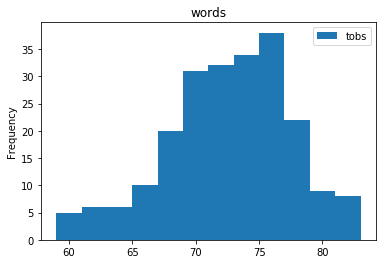

In [19]:
stationdf.plot(kind='hist', bins=12, title="words")
plt.show()

In [ ]:
def calc_temps(sdate, edate):
    session.request(func.min(Measurements.prcp), func.mean(Measurements.prcp), func.max(Measurements.prcp)).\
    filter(Measurements.date >= sdate).\
    filter(Measurements.date <= edate).all()

In [30]:
session.query(func.min(Measurements.prcp), func.avg(Measurements.prcp), func.max(Measurements.prcp))\
.filter(Measurements.date >= "2017-05-13").filter(Measurements.date <= "2017-05-14").all()

[(0.0, 0.146, 1.0)]